## Import the required libraries

In [4]:
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load reviews dataset

In [6]:
df = pd.read_csv("../input/cleaned_reviews.csv")
data = df.copy()  # create a copy of the original dataset to work on
data.head()

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5.0
1,neutral,i ve learned this lesson again open the packag...,88,1.0
2,neutral,it is so slow and lags find better option,9,2.0
3,neutral,roller ball stopped working within months of m...,12,1.0
4,neutral,i like the color and size but it few days out ...,21,1.0


## Explore reviews data

In [7]:
# get  a summary of the data, 
# including the number of rows and columns, column names, number of non-null values, and data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17340 entries, 0 to 17339
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sentiments             17340 non-null  object 
 1   cleaned_review         17337 non-null  object 
 2   cleaned_review_length  17340 non-null  int64  
 3   review_score           17340 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 542.0+ KB


In [8]:
# check the review_score distribution balance
data['review_score'].value_counts()

review_score
5.0    9316
1.0    3898
4.0    1714
2.0    1295
3.0    1117
Name: count, dtype: int64

In [9]:
# check the sentiments distribution balance
data['sentiments'].value_counts()

sentiments
positive    9503
neutral     6303
negative    1534
Name: count, dtype: int64

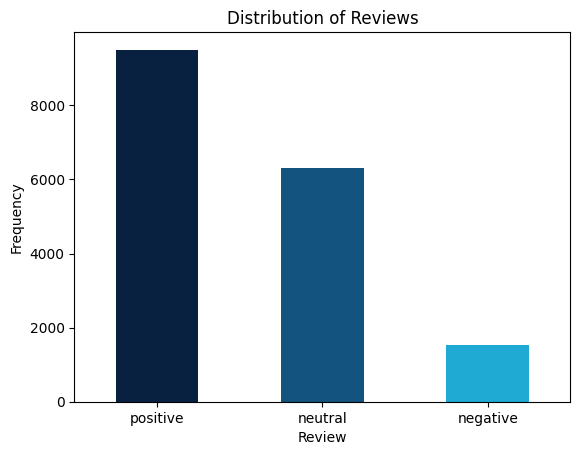

In [10]:
# Define a custom color palette
custom_palette = ["#00204a", "#005792", "#00bbf0"]

# Plot the distribution of the sentiments
ax = sns.countplot(x='sentiments', data=data, palette=custom_palette, width=0.5)

plt.xlabel('Review')  # adding the x-axis label
plt.ylabel('Frequency')  # adding the y-axis label
plt.title('Distribution of Reviews')  # adding the plot title

# Save the plot as a PNG file
plt.savefig('review_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

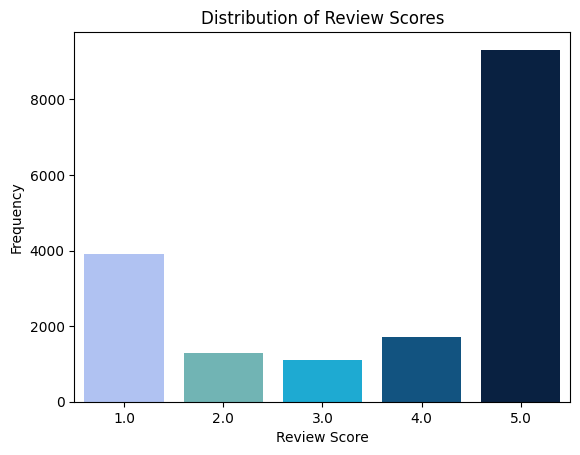

In [17]:
# Define a custom color palette
custom_palette = ["#a5bdfd", "#66bfbf", "#00bbf0", "#005792", "#00204a"]

# Plot the distribution of the review score
ax = sns.countplot(x='review_score', data=data,  width=0.8, palette=custom_palette)

plt.xlabel('Review Score')  # adding the x-axis label
plt.ylabel('Frequency')  # adding the y-axis label
plt.title('Distribution of Review Scores')  # adding the plot title

# Save the plot as a PNG file
plt.savefig('reviewScore_distribution.png', dpi=300, bbox_inches='tight')

plt.show()

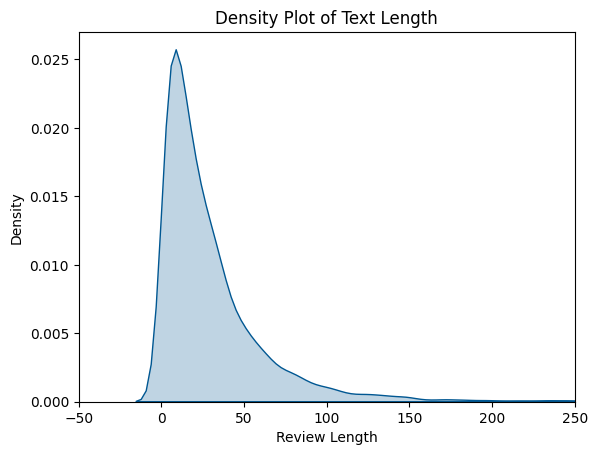

In [18]:
# Plot the distribution of the review length 
sns.kdeplot(data['cleaned_review_length'], fill=True, color='#005792')

plt.xlabel('Review Length')   # adding the x-axis label
plt.title('Density Plot of Text Length')  # adding the plot title

# Set the x-axis limits
plt.xlim(-50, 250)

# Save the plot as a PNG file
plt.savefig('Density_Plot_of_Text_Length.png', dpi=300, bbox_inches='tight')

plt.show()

In [19]:
# check for missing values
missing_values = data.isnull().sum()
missing_values

sentiments               0
cleaned_review           0
cleaned_review_length    0
review_score             0
dtype: int64

### Handle missing values

In [20]:
data.shape

(17337, 4)

In [21]:
# Remove records with null values in the 'cleaned_review' column
data.dropna(subset=['cleaned_review'], inplace=True)

missing_values = data.isnull().sum()
missing_values

sentiments               0
cleaned_review           0
cleaned_review_length    0
review_score             0
dtype: int64

In [22]:
data.shape

(17337, 4)

## Text Preprocessing

### Split the dataset

In [23]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame containing the reviews and labels

# Split the data into features (reviews) and labels
X = data.drop('sentiments', axis=1)
y = data['sentiments']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the train and test sets
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 13869
Test set size: 3468


In [24]:
# Preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert the text to lowercase
    text = text.strip()  # Remove leading ot trailing whitespaces
    
    return text

In [25]:
# Apply preprocessing to train data
X_train['cleaned_review'] = X_train['cleaned_review'].apply(preprocess_text)

In [26]:
# Apply preprocessing to test data
X_test['cleaned_review'] = X_test['cleaned_review'].apply(preprocess_text)

### Text representation

#### using TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

In [28]:
# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train['cleaned_review'])

# Transform the test data using the fitted vectorizer
X_test_transformed = vectorizer.fit_transform(X_test['cleaned_review'])

In [29]:
# exploring the frequency of each word in train set
vectorizer.vocabulary_

{'meets': 2439,
 'need': 2619,
 'shopped': 3577,
 'great': 1731,
 'speaker': 3763,
 'sound': 3741,
 'excellent': 1362,
 'happy': 1782,
 'lights': 2271,
 'showing': 3594,
 'charged': 602,
 'turn': 4230,
 'charge': 600,
 'time': 4115,
 'just': 2127,
 'plug': 2943,
 'going': 1699,
 'fully': 1605,
 'chargeyou': 607,
 'maybe': 2424,
 'wrong': 4567,
 'let': 2249,
 'know': 2172,
 'connectivity': 801,
 'issues': 2084,
 'right': 3378,
 'box': 431,
 'contacted': 823,
 'seller': 3500,
 'did': 1080,
 'respond': 3336,
 'worked': 4534,
 'misshapen': 2511,
 'isn': 2075,
 'comfortable': 718,
 'use': 4337,
 'recommend': 3232,
 'product': 3057,
 'don': 1179,
 'buy': 510,
 'inconvenient': 1984,
 'rechargeable': 3221,
 'mouse': 2561,
 'juice': 2114,
 'dead': 988,
 'months': 2546,
 'pay': 2843,
 'hold': 1851,
 'true': 4215,
 'senior': 3507,
 'citizen': 650,
 'fixed': 1518,
 'income': 1977,
 'chose': 641,
 'cheapest': 618,
 'option': 2752,
 'better': 348,
 'll': 2302,
 'continue': 830,
 'love': 2343,
 'came

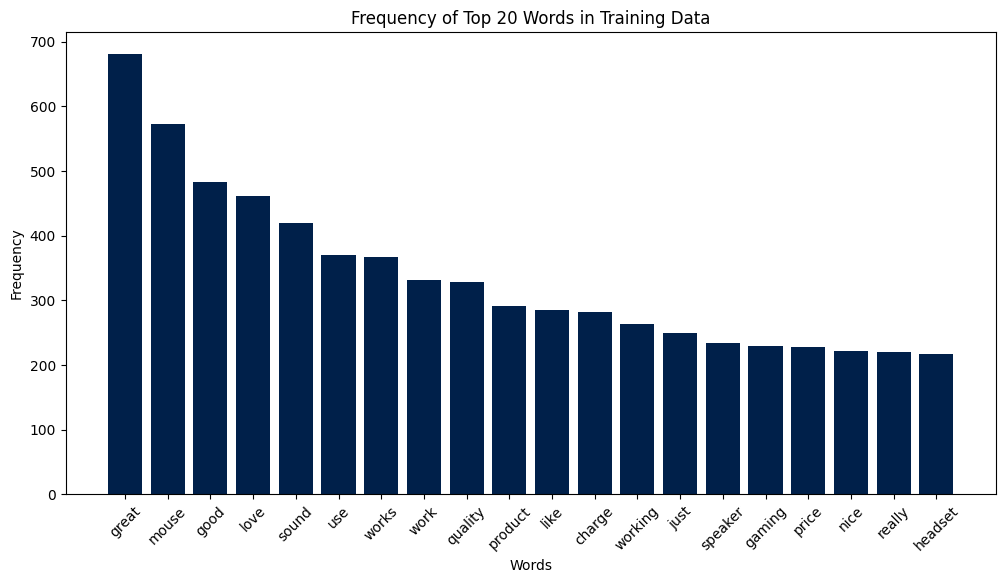

In [31]:
import matplotlib.pyplot as plt

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train['cleaned_review'])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Get the word frequencies
word_frequencies = X_train_transformed.sum(axis=0).A1

# Create a dictionary of word frequencies
word_freq_dict = dict(zip(feature_names, word_frequencies))

# Sort the words by frequency in descending order
sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)

# Get the top 20 words and their frequencies
top_words = [word[0] for word in sorted_word_freq[:20]]
top_frequencies = [word[1] for word in sorted_word_freq[:20]]

# Plot the top 20 words and their frequencies
plt.figure(figsize=(12, 6))
plt.bar(top_words, top_frequencies, color='#00204a')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Top 20 Words in Training Data')
plt.show()

# Save the plot as a PNG file
plt.savefig('Frequency_of_Top_20_Words_in_Training_Data.png', dpi=300, bbox_inches='tight')